<a href="https://colab.research.google.com/github/tokedo/rethinking/blob/main/Rethinking_Chapter_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math

import arviz as az

from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'


# Bayesian learning: Simple Grid Search

In [2]:
def binomial_likelihood(w, n, p):
  """Computes the likelihood of the outcome for binomial experiment.
  """
  return (
      math.factorial(n)
      / math.factorial(w)
      / math.factorial(n-w)
      * (p)**w * (1 - p)**(n-w)
      )


def bayesian_bernoulli_learning(p_grid, prior, n_trials, n_wins):

  # compute data likelihood for each parameter value:
  likelihood = [binomial_likelihood(n_wins, n_trials, p) for p in p_grid]

  # compute the product of the likelihood and prior
  unnorm_posterior = likelihood * prior

  # normalize the posterior distribution so it sums to 1
  posterior = unnorm_posterior / np.sum(unnorm_posterior)

  return posterior


def sample_from_dist(prob_distribution, sample_size):
  # get number of elements from the grid:
  grid = np.linspace(0, 1, len(prob_distribution))

  sample = np.random.choice(
      grid,
      size=round(sample_size),
      replace=True,
      p=prob_distribution
      )

  return sample

In [3]:
# suppose we observed below samples:
data = [0, 1, 1, 0, 1, 1, 1, 0, 1, 1]

grid_size = 20

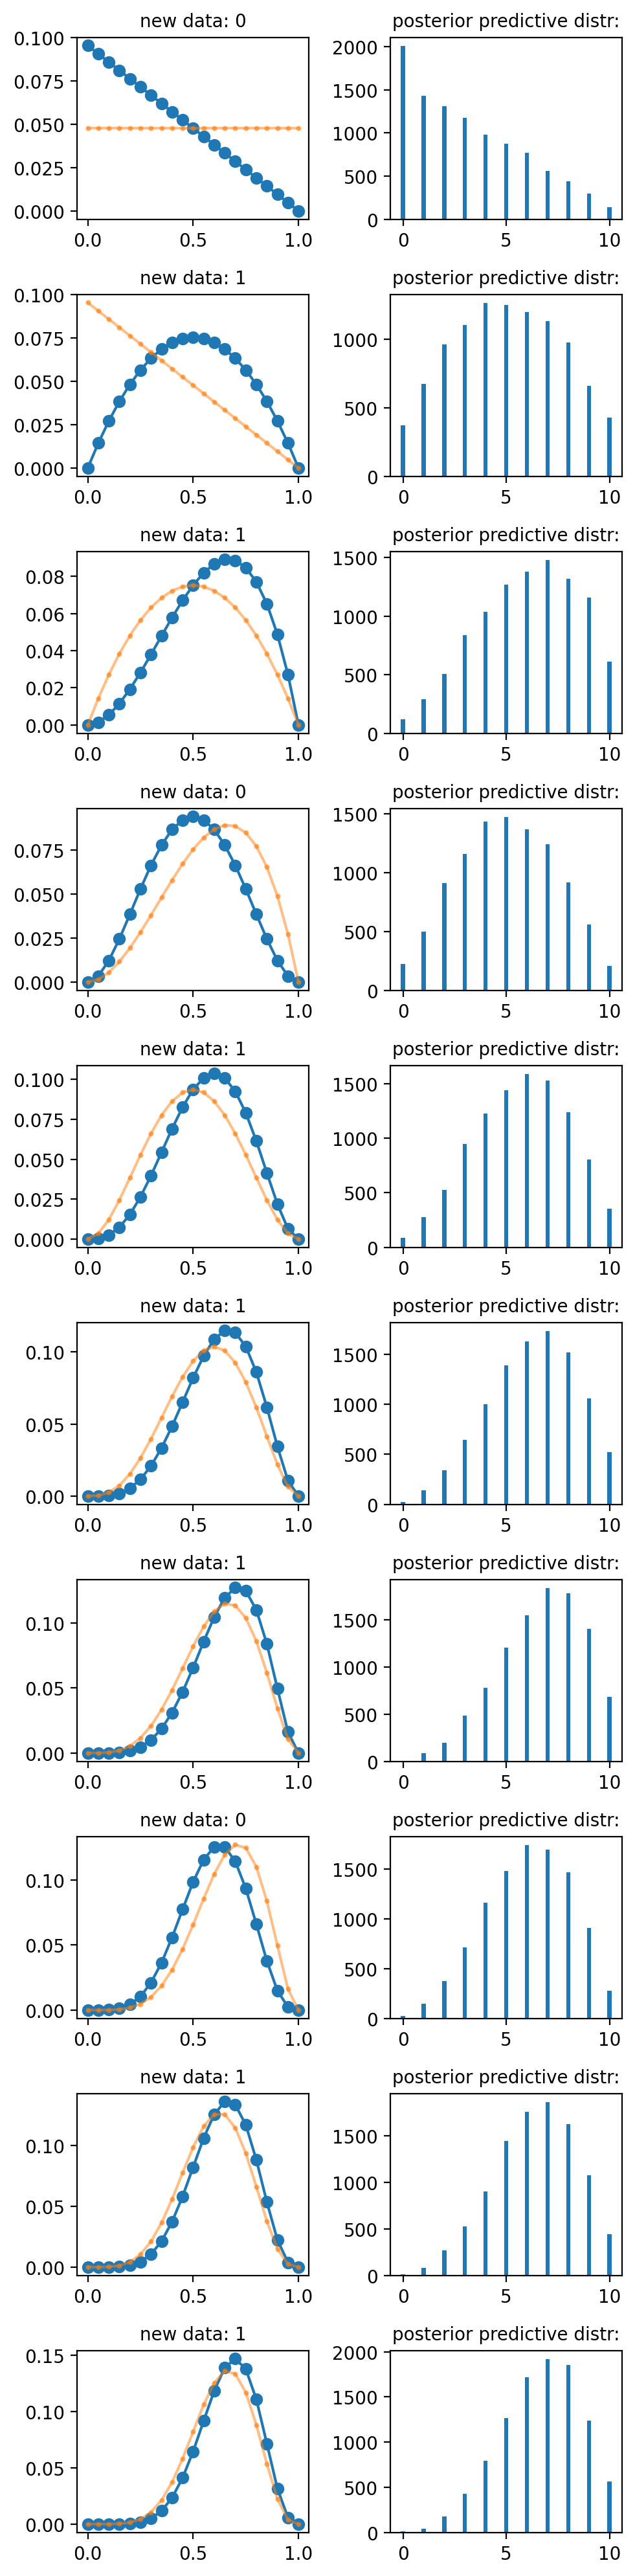

In [4]:
%matplotlib inline

fig, ax = plt.subplots(
    nrows=len(data),
    ncols=2
    )

if len(data)==1:
  ax = [[ax]]
fig.set_figheight(2*len(data))
fig.set_figwidth(5)


# define the grid and our initial priors:
p_grid = np.linspace(0, 1, grid_size+1)

# Define the prior distribution as a uniform distribution
prior = np.array(
    [1 for p in p_grid]
    )


# Define the prior distribution as a uniform distribution
# prior = []
# for p in p_grid:
#   if p>0.5:
#     prior.append(1)
#   else:
#     prior.append(0)
# prior = np.array(prior)
prior = prior / np.sum(prior)


# go over the data and plot priors and posteriors:

for idx, res in enumerate(data):

  # plot posterior distribution based on incoming data:

  plt.sca(ax[idx][0])

  post = bayesian_bernoulli_learning(
      p_grid,
      prior,
      1,
      res
      )

  plt.plot(p_grid, post, '-o', label='posterior')
  plt.plot(p_grid, prior, '-o',  alpha=0.5, markersize=2, label='prior')

  prior = post
  plt.title(f"new data: {data[idx]}", fontsize=10)

  # if idx==len(data)-1:
  #   plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

  # plot histogram of posterior predictive distribtuion:


  # sample p from the posterior distribution:
  p_sample_post = sample_from_dist(post, 1e4)

  # for each p simulate the outcome of 10 tossing experiment:
  res_sample = [
      np.sum(np.random.random(len(data)) < p)
      for p in p_sample_post
      ]
  res_hist = np.histogram(
      res_sample,
      bins=len(data)+1,
      range=(0-0.5, len(data)+0.5)
      )[0]
  res_hist_norm = res_hist / np.sum(res_hist)

  plt.sca(ax[idx][1])
  plt.bar(np.arange(len(data)+1), res_hist, width=0.2)
  plt.title('posterior predictive distr:', fontsize=10)

fig.tight_layout()
fig.show()


# Explore the samples from posterior distribution

In [5]:
grid_size = 1000

# define the grid and our initial priors:
p_grid = np.linspace(0, 1, grid_size+1)

# Define the prior distribution as a uniform distribution
prior = np.array(
    [1 for p in p_grid]
    )
prior = prior / np.sum(prior)

In [6]:
post = bayesian_bernoulli_learning(
    p_grid,
    prior,
    9,
    6
    )

In [7]:
n_samples = 1e4
samples = sample_from_dist(post, n_samples)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


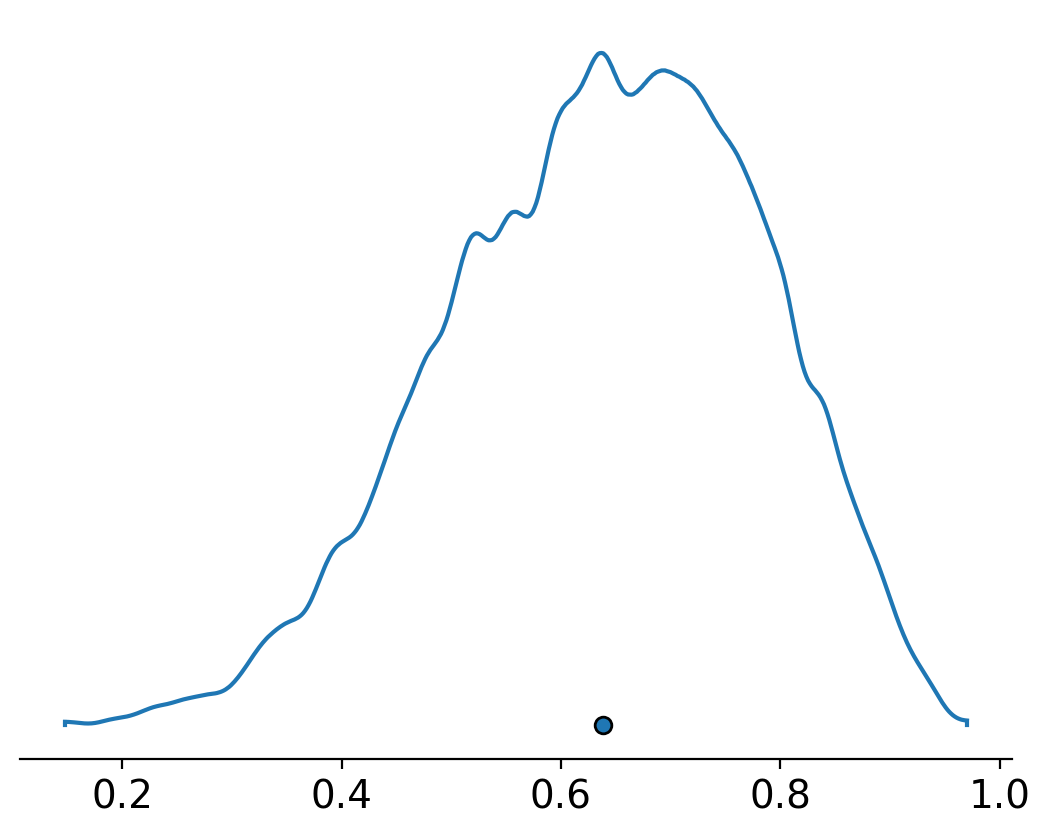

In [8]:
az.plot_density({"": samples}, hdi_prob=1)
plt.show()

In [9]:
np.sum(samples < 0.5 )/n_samples

0.1707

In [10]:
np.quantile(samples, 0.9)

0.8150000000000001

In [11]:
az.hdi(samples, hdi_prob=0.5)

array([0.584, 0.781])

# Chapter 3 problems

In [12]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,
1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,
1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])

3H1

In [13]:
grid_size = 1000

# define the grid and our initial priors:
p_grid = np.linspace(0, 1, grid_size+1)

# Define the prior distribution as a uniform distribution
prior = np.array(
    [1 for p in p_grid]
    )
prior = prior / np.sum(prior)

In [14]:
all_birth = np.concatenate((birth1, birth2))
all_birth

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0])

In [15]:
likelihood = binomial_likelihood(
    sum(all_birth),
    len(all_birth),
    p_grid)


posterior_unnormalized =  likelihood * prior
posterior = posterior_unnormalized / np.sum(posterior_unnormalized)

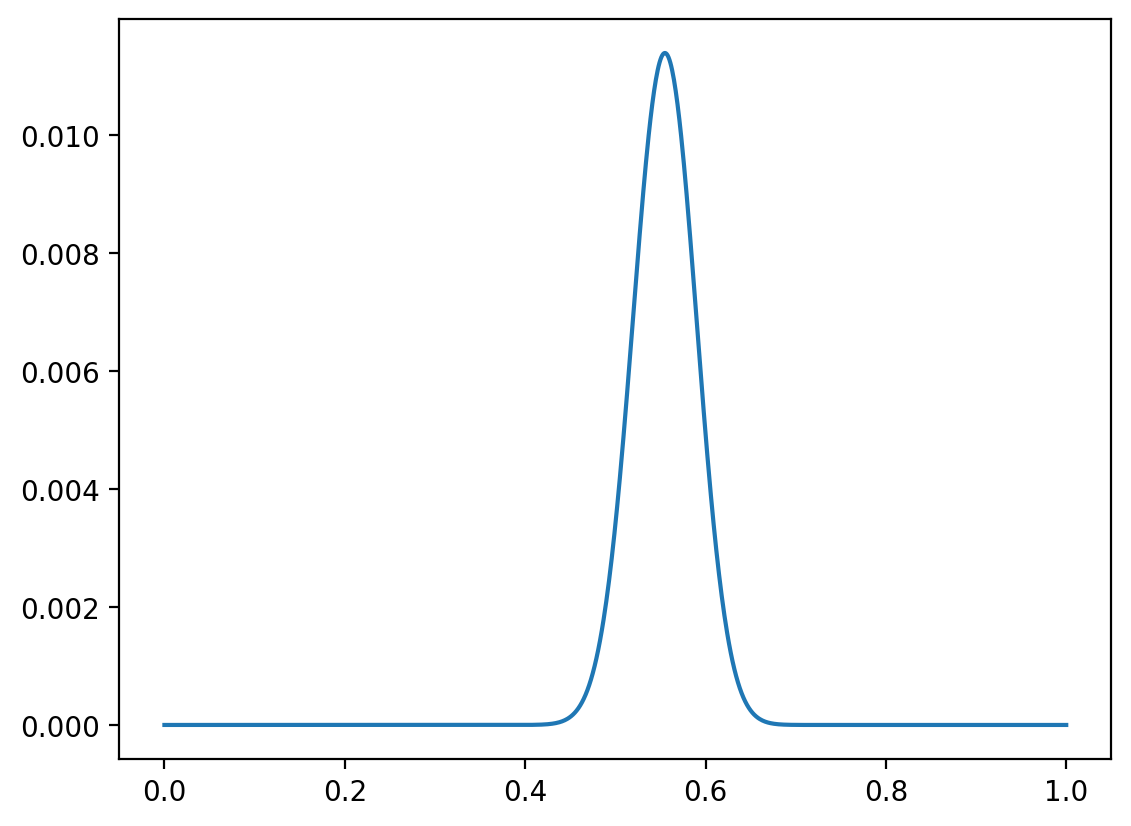

In [16]:
plt.plot(p_grid, posterior)
plt.show()

In [17]:
# parameter value that maximize the posterior probability:
p_grid[np.argmax(posterior)]

0.555

3H2

In [18]:
sampels = sample_from_dist(posterior, 1e4)
sampels

array([0.579, 0.536, 0.567, ..., 0.6  , 0.533, 0.582])

In [19]:
# 50% highest posterior density interval:
az.hdi(sampels, 0.5)

array([0.534, 0.58 ])

In [20]:
# 89% highest posterior density interval:
az.hdi(sampels, 0.89)

array([0.5 , 0.61])

In [21]:
# 97% highest posterior density interval:
az.hdi(sampels, 0.97)

array([0.479, 0.629])

3H3

In [22]:
# simulate 10000 replicas of the above experiment
sim_boys_count = np.random.binomial(len(all_birth), sampels)

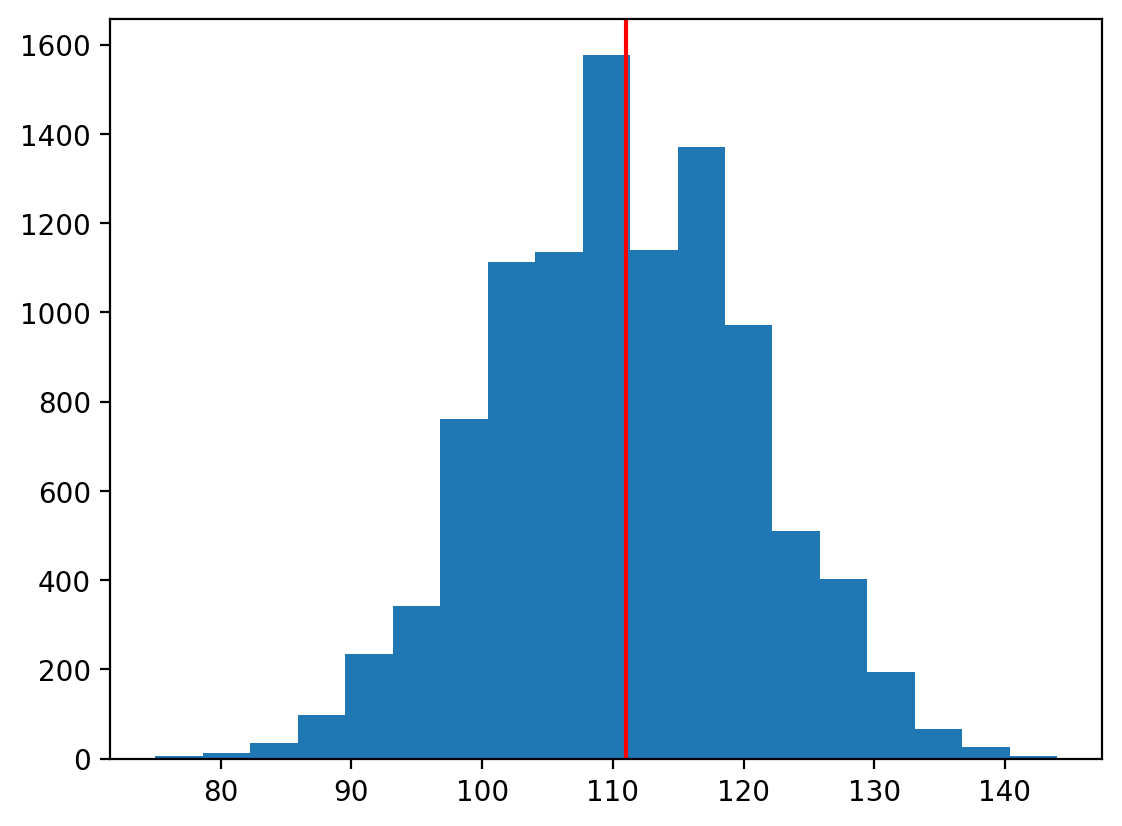

In [23]:
plt.hist(sim_boys_count, bins=19)
y_min, y_max = plt.ylim()
plt.vlines(np.sum(all_birth), y_min, y_max, colors='red')
plt.ylim(y_min, y_max)
plt.show()

3H4

In [24]:
sim_boys_count1 = np.random.binomial(len(birth1), sampels)

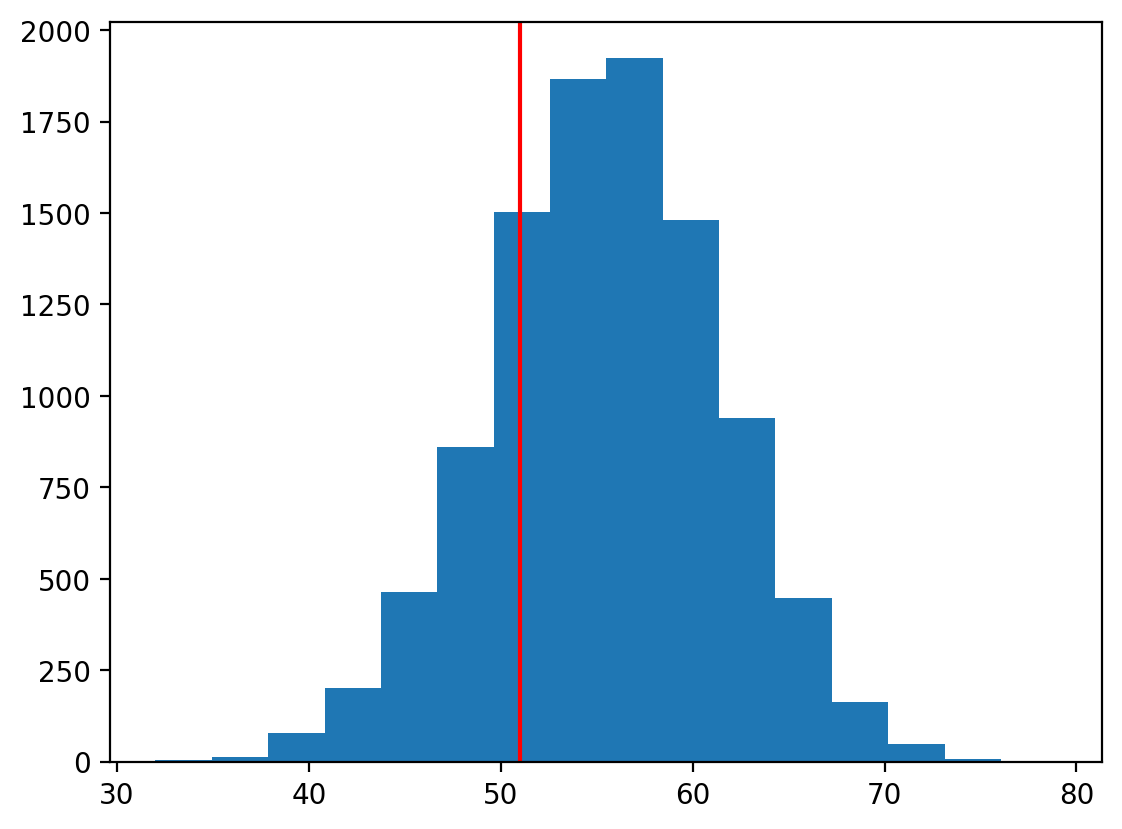

In [25]:
plt.hist(sim_boys_count1, bins=16)
y_min, y_max = plt.ylim()
plt.vlines(np.sum(birth1), y_min, y_max, colors='red')
plt.ylim(y_min, y_max)
plt.show()

3H5

In [26]:
first_is_girl = np.where(birth1==0)[0]

second_first_is_girl = birth2[first_is_girl]
n_first_is_girl = len(first_is_girl)

In [27]:
# simulate number of boys for population of families
# who had girl as their first child:
sim_boys_first_is_girl = np.random.binomial(n_first_is_girl, sampels)

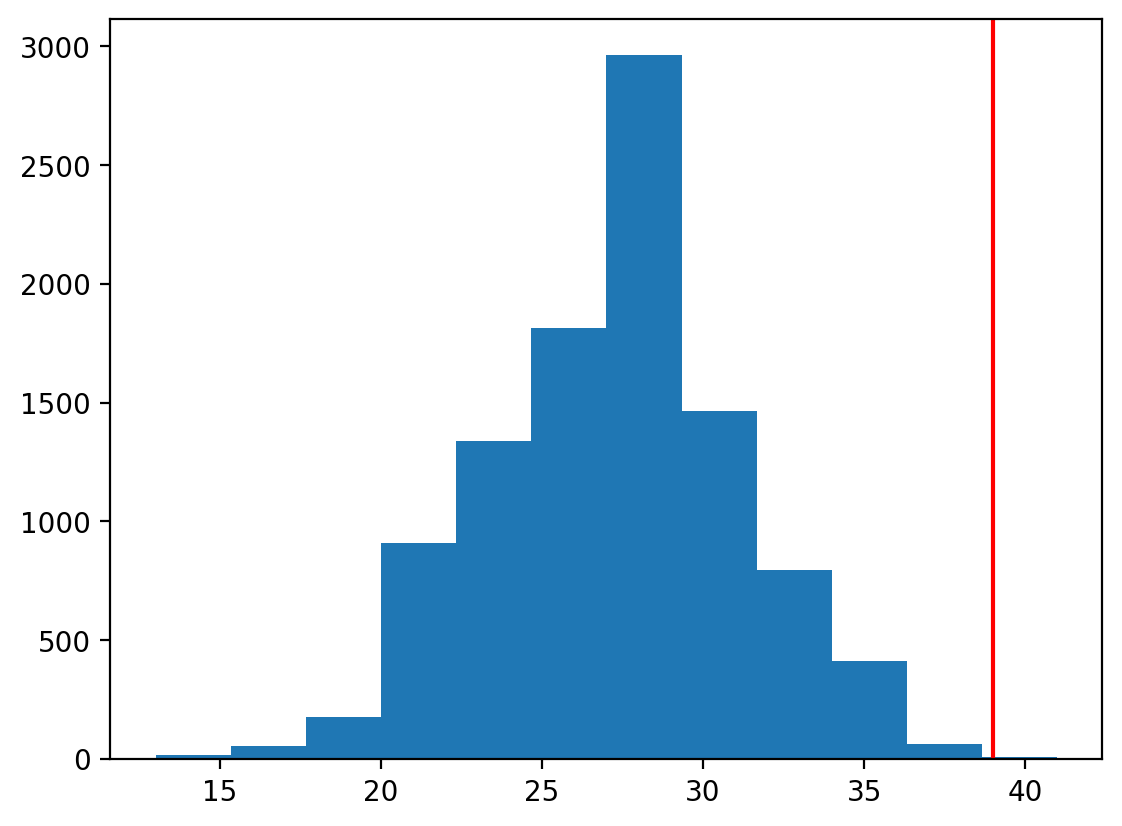

In [28]:
plt.hist(sim_boys_first_is_girl, bins=12)
y_min, y_max = plt.ylim()
plt.vlines(np.sum(second_first_is_girl), y_min, y_max, colors='red')
plt.ylim(y_min, y_max)
plt.show()